## High percentiles and ROME, all models together

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat

from os.path import expanduser
home = expanduser("~")

import timeit

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 


switch = {
    'local_files': True, 
    'nci_files': False, 
    }

In [2]:
models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    # 'CCSM4',        # 6 # cannot concatanate files for rcp85 run
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC'     # 19
    ]


experiments = [
    'historical',
    # 'rcp85'
    ]
experiment = experiments[0]

In [3]:
model = 'GFDL-CM3'
if switch['local_files']:
    folder = home + '/Documents/data/cmip5/' + model

if switch['nci_files']:
    folder = '/g/data/k10/cb4968/data/cmip5/'+ model


fileName = model + '_rome_' + experiment + '.nc'
path = folder + '/' + fileName
rome = xr.open_dataset(path)
rome

<xarray.Dataset>
Dimensions:  (time: 10950)
Coordinates:
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
Data variables:
    rome     (time) float64 ...
    rome_n   (time) float64 ...
Attributes:
    description:  ROME based on all and the 8 largest contiguous convective r...
    units:        km^2

In [4]:
model = 'GFDL-CM3'
if switch['local_files']:
    folder = home + '/Documents/data/cmip5/' + model

if switch['nci_files']:
    folder = '/g/data/k10/cb4968/data/cmip5/'+ model


fileName = model + '_pr_percentiles_' + experiment + '.nc'
path = folder + '/' + fileName
pr_percentiles = xr.open_dataset(path)
pr_percentiles

<xarray.Dataset>
Dimensions:  (time: 10950)
Coordinates:
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
Data variables:
    pr95     (time) float64 ...
    pr97     (time) float64 ...
    pr99     (time) float64 ...
    pr999    (time) float64 ...

In [5]:
rome_options = [
    'rome',
    # 'rome_n'
    ]
rome_option = rome_options[0]

In [6]:
percentile_options = [
    # 'pr95',
    # 'pr97',
    'pr99',
    # 'pr999',
    ]
percentile_option = percentile_options[0]

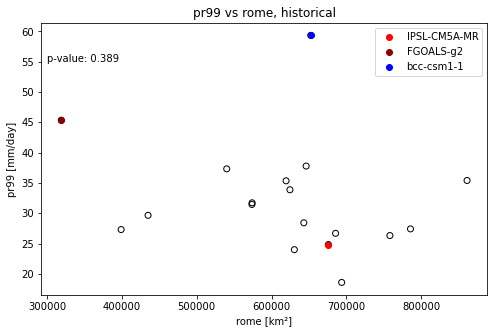

In [7]:
y= []
x= []
for model in models:
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model

    fileName = model + '_rome_' + experiment + '.nc'
    path = folder + '/' + fileName
    rome = xr.open_dataset(path)
    x = np.append(x, rome[rome_option].mean(dim='time'))

    fileName = model + '_pr_percentiles_' + experiment + '.nc'
    path = folder + '/' + fileName
    pr_percentile = xr.open_dataset(path)
    y = np.append(y, pr_percentile[percentile_option].mean(dim='time'))



fig = plt.figure(figsize=(8,5))
plt.scatter(x,y,facecolors='none', edgecolor='k')
res= stats.pearsonr(x,y)
#plt.text(3e5, 80,'R$^2$: '+ str(round(res[0]**2,3)),fontsize=10)
plt.text(3e5, 55,'p-value: '+ str(round(res[1],3)),fontsize=10)


x_leg = [models.index('IPSL-CM5A-MR'),models.index('FGOALS-g2'), models.index('bcc-csm1-1')]
label = ['IPSL-CM5A-MR','FGOALS-g2','bcc-csm1-1']
colors = ['r','darkred','b']
j=0
for i in x_leg:
    plt.scatter(x[i],y[i],c=colors[j], label=label[j])
    j+=1

plt.title(percentile_option  + ' vs ' + rome_option + ', ' + experiment)
plt.xlabel(rome_option  + ' [km\u00b2]')
plt.ylabel(percentile_option + ' [mm/day]')
plt.legend()



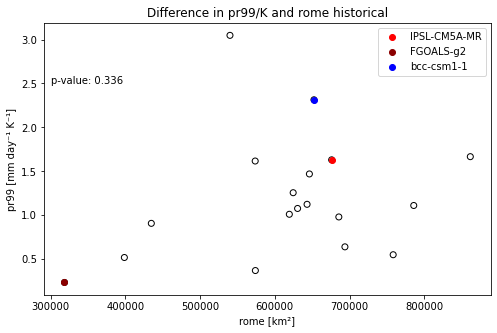

In [8]:
x, y_diff = [], []

for model in models:
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model


    fileName = model + '_tas_sMean_historical.nc'
    path = folder + '/' + fileName
    tas_sMean = xr.open_dataset(path).tas_sMean
    tas_historical = tas_sMean.mean(dim='time')

    fileName = model + '_tas_sMean_rcp85.nc'
    path = folder + '/' + fileName
    tas_sMean = xr.open_dataset(path).tas_sMean
    tas_rcp = tas_sMean.mean(dim='time')

    tas_diff = tas_rcp - tas_historical


    fileName = model + '_rome_historical.nc'
    path = folder + '/' + fileName
    rome = xr.open_dataset(path)
    x_historical = rome[rome_option].mean(dim='time')


    fileName = model + '_rome_rcp85.nc'
    path = folder + '/' + fileName
    rome = xr.open_dataset(path)
    x_rcp = rome[rome_option].mean(dim='time')


    x = np.append(x,  x_historical)


    fileName = model + '_pr_percentiles_historical.nc'
    path = folder + '/' + fileName
    pr_percentile = xr.open_dataset(path)
    y_historical = pr_percentile[percentile_option].mean(dim='time')


    fileName = model + '_pr_percentiles_rcp85.nc'
    path = folder + '/' + fileName
    pr_percentile = xr.open_dataset(path)
    y_rcp = pr_percentile[percentile_option].mean(dim='time')


    y_diff  = np.append(y_diff, (y_rcp - y_historical)/tas_diff)





fig = plt.figure(figsize=(8,5))
plt.scatter(x,y_diff,facecolors='none', edgecolor='k')
res= stats.pearsonr(x,y_diff)
#plt.text(3e5, 80,'R$^2$: '+ str(round(res[0]**2,3)),fontsize=10)
plt.text(3e5, 2.5,'p-value: '+ str(round(res[1],3)),fontsize=10)


x_leg = [models.index('IPSL-CM5A-MR'),models.index('FGOALS-g2'), models.index('bcc-csm1-1')]
label = ['IPSL-CM5A-MR','FGOALS-g2','bcc-csm1-1']
colors = ['r','darkred','b']
j=0
for i in x_leg:
    plt.scatter(x[i],y_diff[i],c=colors[j], label=label[j])
    j+=1

plt.title('Difference in ' + percentile_option  + '/K and ' + rome_option + ' ' + experiment)
plt.xlabel(rome_option  + ' [km\u00b2]')
plt.ylabel(percentile_option + ' [mm day' + chr(0x207B) + chr(0x00B9) + ' K' + chr(0x207B) + chr(0x00B9) + ']')
plt.legend()



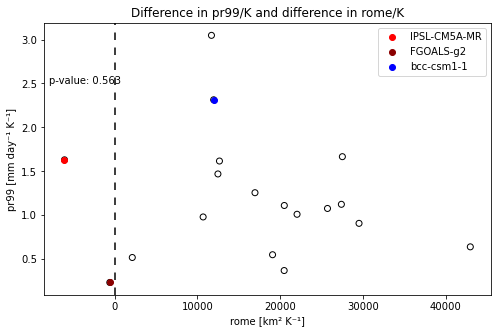

In [9]:
x_diff, y_diff = [], []

for model in models:
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model


    fileName = model + '_tas_sMean_historical.nc'
    path = folder + '/' + fileName
    tas_sMean = xr.open_dataset(path).tas_sMean
    tas_historical = tas_sMean.mean(dim='time')

    fileName = model + '_tas_sMean_rcp85.nc'
    path = folder + '/' + fileName
    tas_sMean = xr.open_dataset(path).tas_sMean
    tas_rcp = tas_sMean.mean(dim='time')

    tas_diff = tas_rcp - tas_historical


    fileName = model + '_rome_historical.nc'
    path = folder + '/' + fileName
    rome = xr.open_dataset(path)
    x_historical = rome[rome_option].mean(dim='time')


    fileName = model + '_rome_rcp85.nc'
    path = folder + '/' + fileName
    rome = xr.open_dataset(path)
    x_rcp = rome[rome_option].mean(dim='time')


    x_diff = np.append(x_diff,  (x_rcp - x_historical) / tas_diff)


    fileName = model + '_pr_percentiles_historical.nc'
    path = folder + '/' + fileName
    pr_percentile = xr.open_dataset(path)
    y_historical = pr_percentile[percentile_option].mean(dim='time')


    fileName = model + '_pr_percentiles_rcp85.nc'
    path = folder + '/' + fileName
    pr_percentile = xr.open_dataset(path)
    y_rcp = pr_percentile[percentile_option].mean(dim='time')


    y_diff  = np.append(y_diff, (y_rcp - y_historical)/tas_diff)





fig = plt.figure(figsize=(8,5))
plt.scatter(x_diff,y_diff,facecolors='none', edgecolor='k')
res= stats.pearsonr(x_diff,y_diff)
#plt.text(3e5, 80,'R$^2$: '+ str(round(res[0]**2,3)),fontsize=10)
plt.text(-8000, 2.5,'p-value: '+ str(round(res[1],3)),fontsize=10)


x_leg = [models.index('IPSL-CM5A-MR'),models.index('FGOALS-g2'), models.index('bcc-csm1-1')]
label = ['IPSL-CM5A-MR','FGOALS-g2','bcc-csm1-1']
colors = ['r','darkred','b']
j=0
for i in x_leg:
    plt.scatter(x_diff[i],y_diff[i],c=colors[j], label=label[j])
    j+=1

plt.title('Difference in ' + percentile_option  + '/K and difference in ' + rome_option + '/K')
plt.axvline(0, color='k',linestyle= (0, (5, 5)))
plt.xlabel(rome_option  + ' [km\u00b2' + ' K' + chr(0x207B) + chr(0x00B9) + ']')
plt.ylabel(percentile_option + ' [mm day' + chr(0x207B) + chr(0x00B9) + ' K' + chr(0x207B) + chr(0x00B9) + ']')
plt.legend()



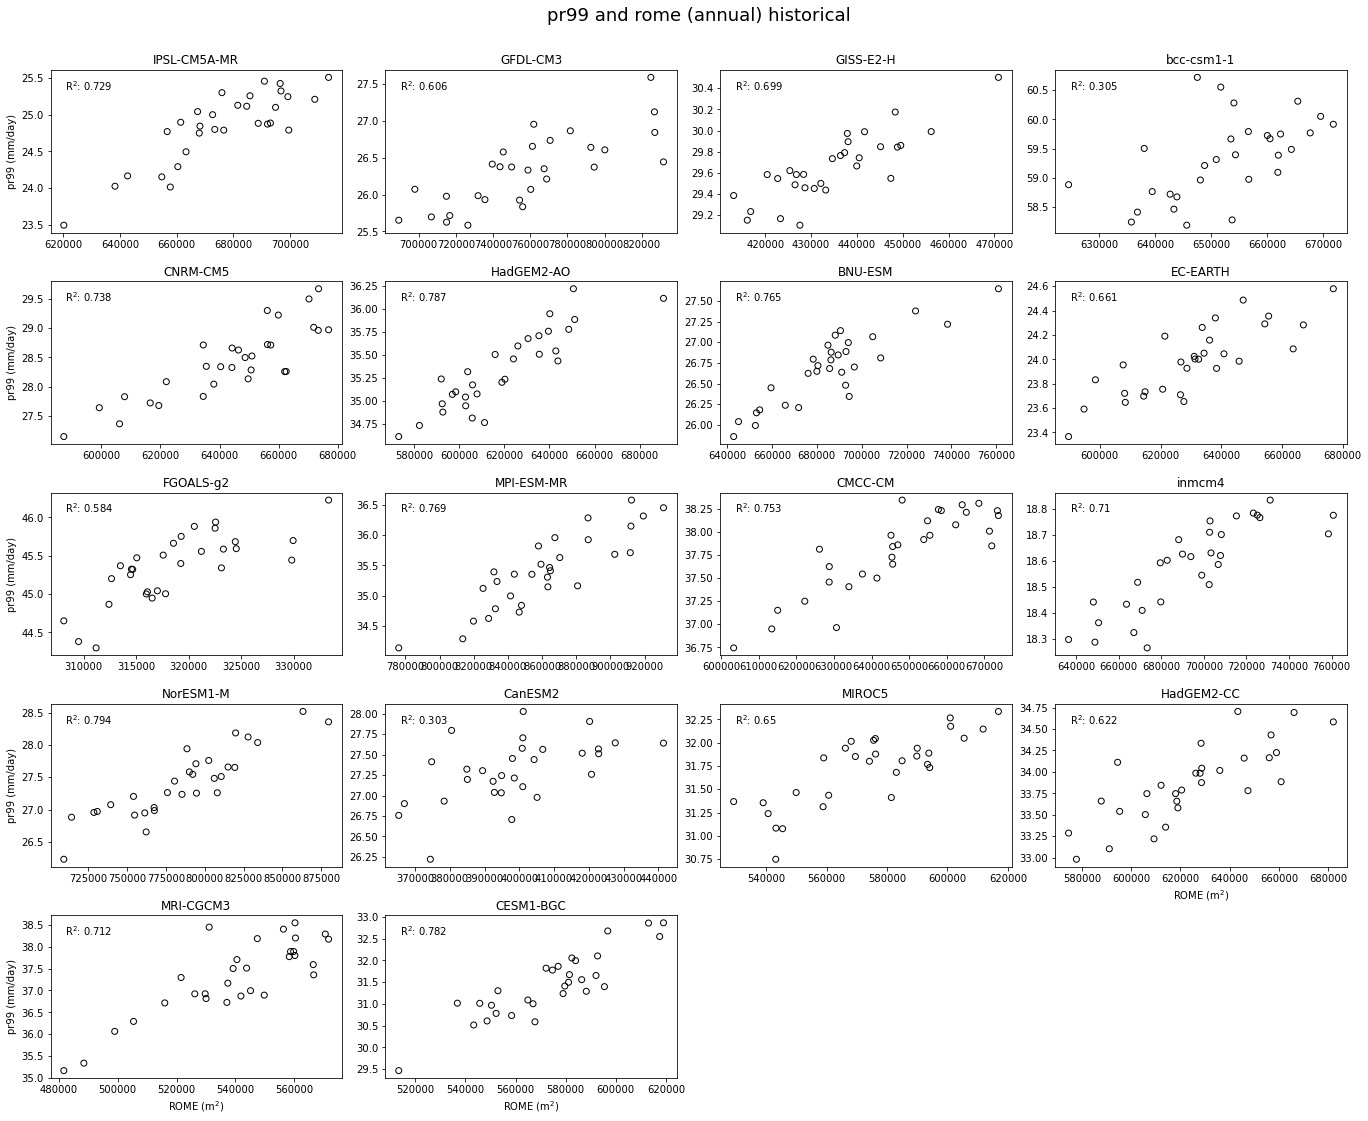

In [58]:
fig= plt.figure(figsize=(22.5,17.5))
fig.suptitle(percentile_option + ' and ' + rome_option  + ' (annual) ' + experiment, fontsize=18, y=0.95)

for i, model in enumerate(models):
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model


    fileName = model + '_rome_' + experiment + '.nc'
    path = folder + '/' + fileName
    rome = xr.open_dataset(path)

    fileName = model + '_pr_percentiles_' + experiment + '.nc'
    path = folder + '/' + fileName
    pr_percentile = xr.open_dataset(path)


    ax= fig.add_subplot(5,4,i+1)
    
    x = rome[rome_option].resample(time='Y').mean(dim='time')
    y = pr_percentile[percentile_option].resample(time='Y').mean(dim='time')
    plt.scatter(x,y,facecolors='none', edgecolor='k')

    #ax.spines.right.set_visible(False)
    #ax.spines.top.set_visible(False)

    res= stats.pearsonr(x,y)

    if res[1]<=0.05:
        ax.annotate('R$^2$: '+ str(round(res[0]**2,3)), xy=(0.2, 0.1), xycoords='axes fraction', xytext=(0.05, 0.875), textcoords='axes fraction')


    plt.title(model)

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        plt.ylabel(percentile_option + ' (mm/day)')


    if i>=15:
        plt.xlabel('ROME (m$^2$)')


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)
#sns.despine(top=True, right=True, left=False, bottom=False)

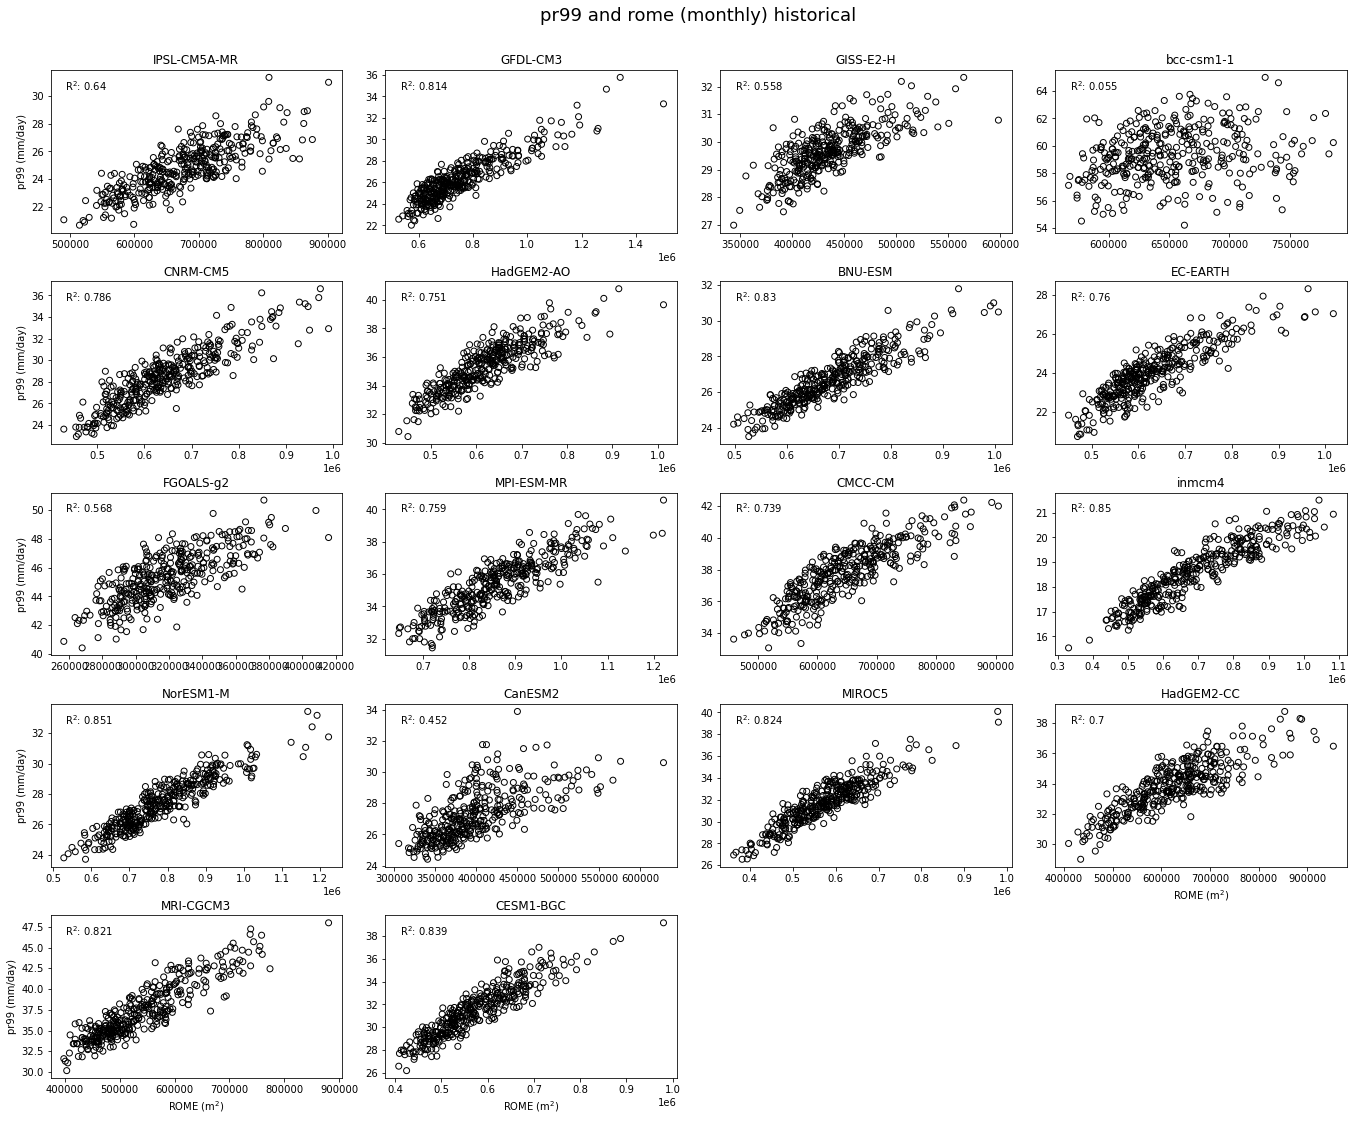

In [56]:
fig= plt.figure(figsize=(22.5,17.5))
fig.suptitle(percentile_option + ' and ' + rome_option  + ' (monthly) ' + experiment, fontsize=18, y=0.95)

for i, model in enumerate(models):
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model


    fileName = model + '_rome_' + experiment + '.nc'
    path = folder + '/' + fileName
    rome = xr.open_dataset(path)

    fileName = model + '_pr_percentiles_' + experiment + '.nc'
    path = folder + '/' + fileName
    pr_percentile = xr.open_dataset(path)


    ax= fig.add_subplot(5,4,i+1)
    
    x = rome[rome_option].resample(time='M').mean(dim='time')
    y = pr_percentile[percentile_option].resample(time='M').mean(dim='time')
    plt.scatter(x,y,facecolors='none', edgecolor='k')

    #ax.spines.right.set_visible(False)
    #ax.spines.top.set_visible(False)

    res= stats.pearsonr(x,y)

    if res[1]<=0.05:
        ax.annotate('R$^2$: '+ str(round(res[0]**2,3)), xy=(0.2, 0.1), xycoords='axes fraction', xytext=(0.05, 0.875), textcoords='axes fraction')


    plt.title(model)

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        plt.ylabel(percentile_option + ' (mm/day)')


    if i>=15:
        plt.xlabel('ROME (m$^2$)')


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)
#sns.despine(top=True, right=True, left=False, bottom=False)

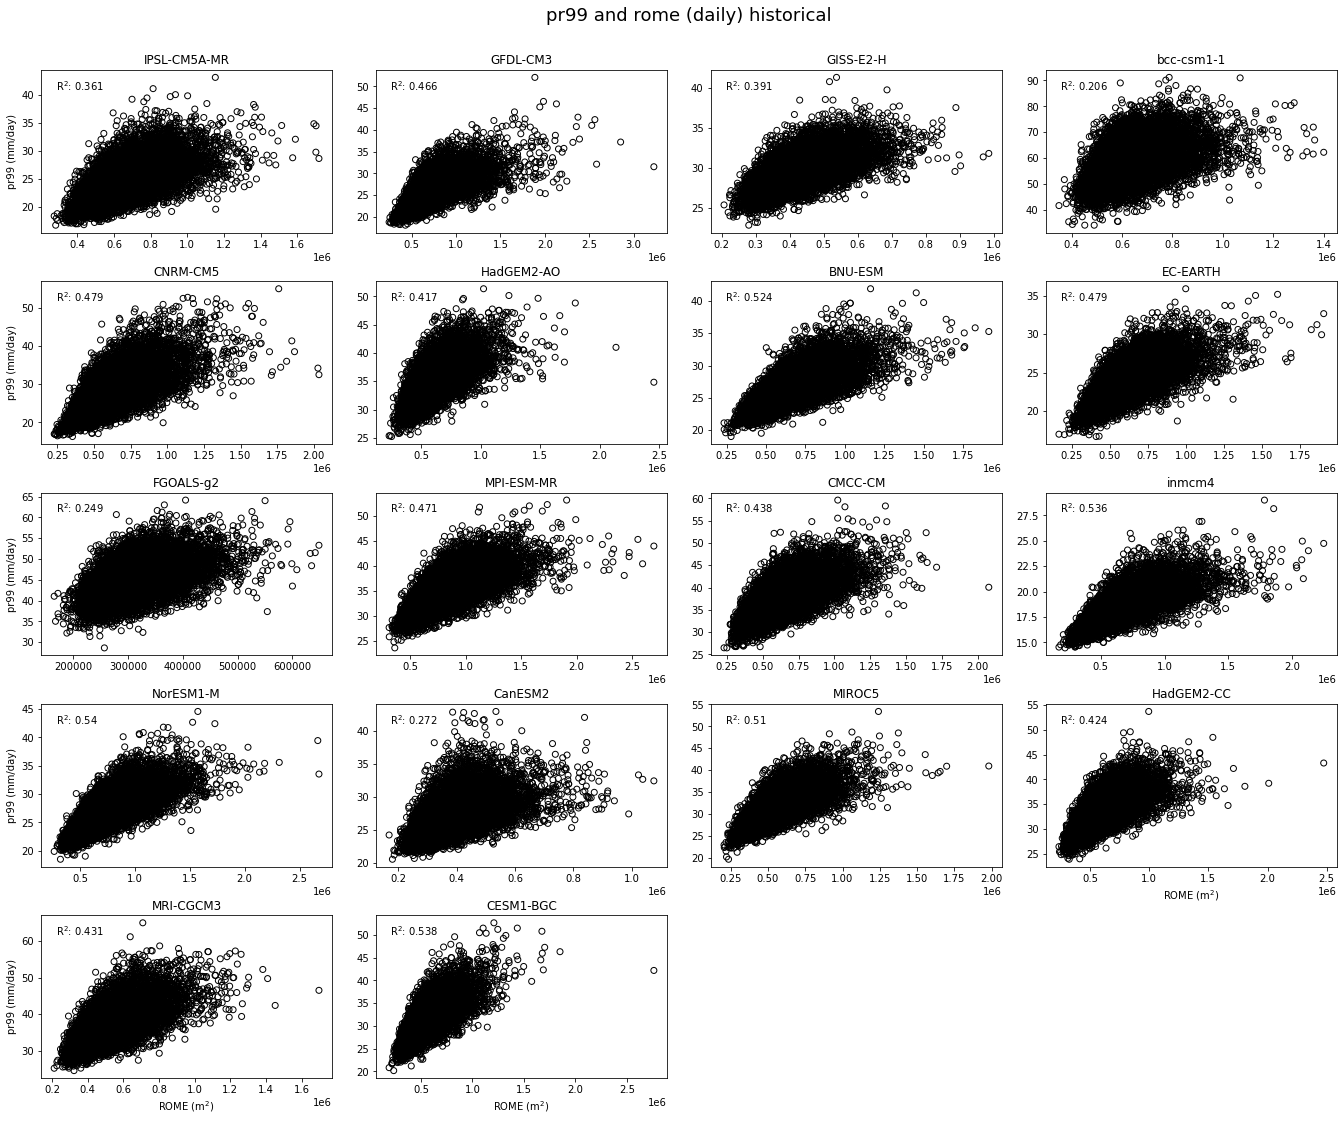

In [57]:
fig= plt.figure(figsize=(22.5,17.5))
fig.suptitle(percentile_option + ' and ' + rome_option  + ' (daily) ' + experiment, fontsize=18, y=0.95)

for i, model in enumerate(models):
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model


    fileName = model + '_rome_' + experiment + '.nc'
    path = folder + '/' + fileName
    rome = xr.open_dataset(path)

    fileName = model + '_pr_percentiles_' + experiment + '.nc'
    path = folder + '/' + fileName
    pr_percentile = xr.open_dataset(path)


    ax= fig.add_subplot(5,4,i+1)
    
    x = rome[rome_option]
    y = pr_percentile[percentile_option]
    plt.scatter(x,y,facecolors='none', edgecolor='k')

    #ax.spines.right.set_visible(False)
    #ax.spines.top.set_visible(False)

    res= stats.pearsonr(x,y)

    if res[1]<=0.05:
        ax.annotate('R$^2$: '+ str(round(res[0]**2,3)), xy=(0.2, 0.1), xycoords='axes fraction', xytext=(0.05, 0.875), textcoords='axes fraction')


    plt.title(model)

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        plt.ylabel(percentile_option + ' (mm/day)')


    if i>=15:
        plt.xlabel('ROME (m$^2$)')


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)
#sns.despine(top=True, right=True, left=False, bottom=False)

In [11]:
def to_monthly(da):
    year = da.time.dt.year
    month = da.time.dt.month

    # assign new coords
    da = da.assign_coords(year=("time", year.data), month=("time", month.data))

    # reshape the array to (..., "month", "year")
    return da.set_index(time=("year", "month")).unstack("time")

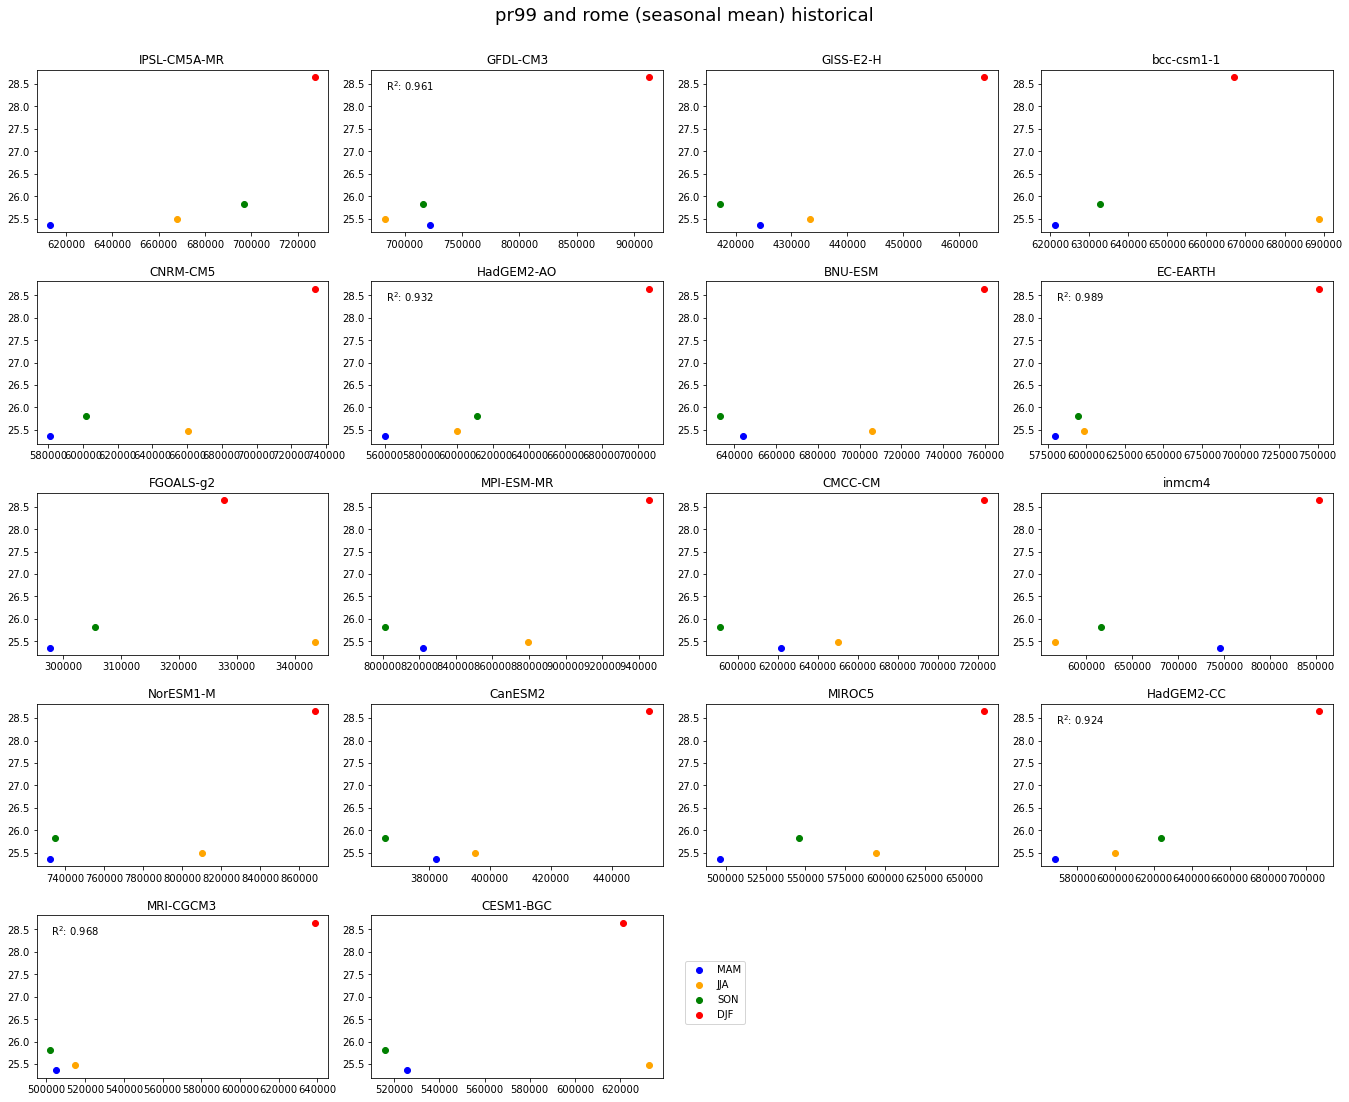

In [59]:
fig= plt.figure(figsize=(22.5,17.5))
fig.suptitle(percentile_option + ' and ' + rome_option  + ' (seasonal mean) ' + experiment, fontsize=18, y=0.95)

for i, model in enumerate(models):
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model


    fileName = model + '_rome_' + experiment + '.nc'
    path = folder + '/' + fileName
    rome = xr.open_dataset(path)
    rome_season = rome[rome_option].resample(time='QS-DEC').mean(dim="time")
    rome_season = to_monthly(rome_season)
    rome_season = rome_season.rename({'month':'season'})
    rome_season = rome_season.assign_coords(season = ["MAM", "JJA", "SON", "DJF"])


    fileName = model + '_pr_percentiles_' + experiment + '.nc'
    path = folder + '/' + fileName
    pr_percentile = xr.open_dataset(path)
    pr_season = pr_percentiles[percentile_option].resample(time='QS-DEC').mean(dim="time")
    pr_season = to_monthly(pr_season)
    pr_season = pr_season.rename({'month':'season'})
    pr_season = pr_season.assign_coords(season = ["MAM", "JJA", "SON", "DJF"])


    ax= fig.add_subplot(5,4,i+1)
    
    x = rome_season.mean(dim='year')
    y = pr_season.mean(dim='year')

    colors = ['blue', 'orange', 'green', 'red']
    for i, season in enumerate(rome_season.season.values):
        xi = rome_season.mean(dim='year').sel(season=season)
        yi = pr_season.mean(dim='year').sel(season=season)
        ax.scatter(xi, yi, c=colors[i], label=season)


    # plt.scatter(x,y,facecolors='none', edgecolor='k')

    #ax.spines.right.set_visible(False)
    #ax.spines.top.set_visible(False)

    res= stats.pearsonr(x,y)

    if res[1]<=0.05:
        ax.annotate('R$^2$: '+ str(round(res[0]**2,3)), xy=(0.2, 0.1), xycoords='axes fraction', xytext=(0.05, 0.875), textcoords='axes fraction')


    plt.title(model)

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        plt.ylabel(percentile_option + ' (mm/day)')


    if i>=15:
        plt.xlabel('ROME (m$^2$)')


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)
plt.legend(bbox_to_anchor=(1.3, 0.75))
#sns.despine(top=True, right=True, left=False, bottom=False)

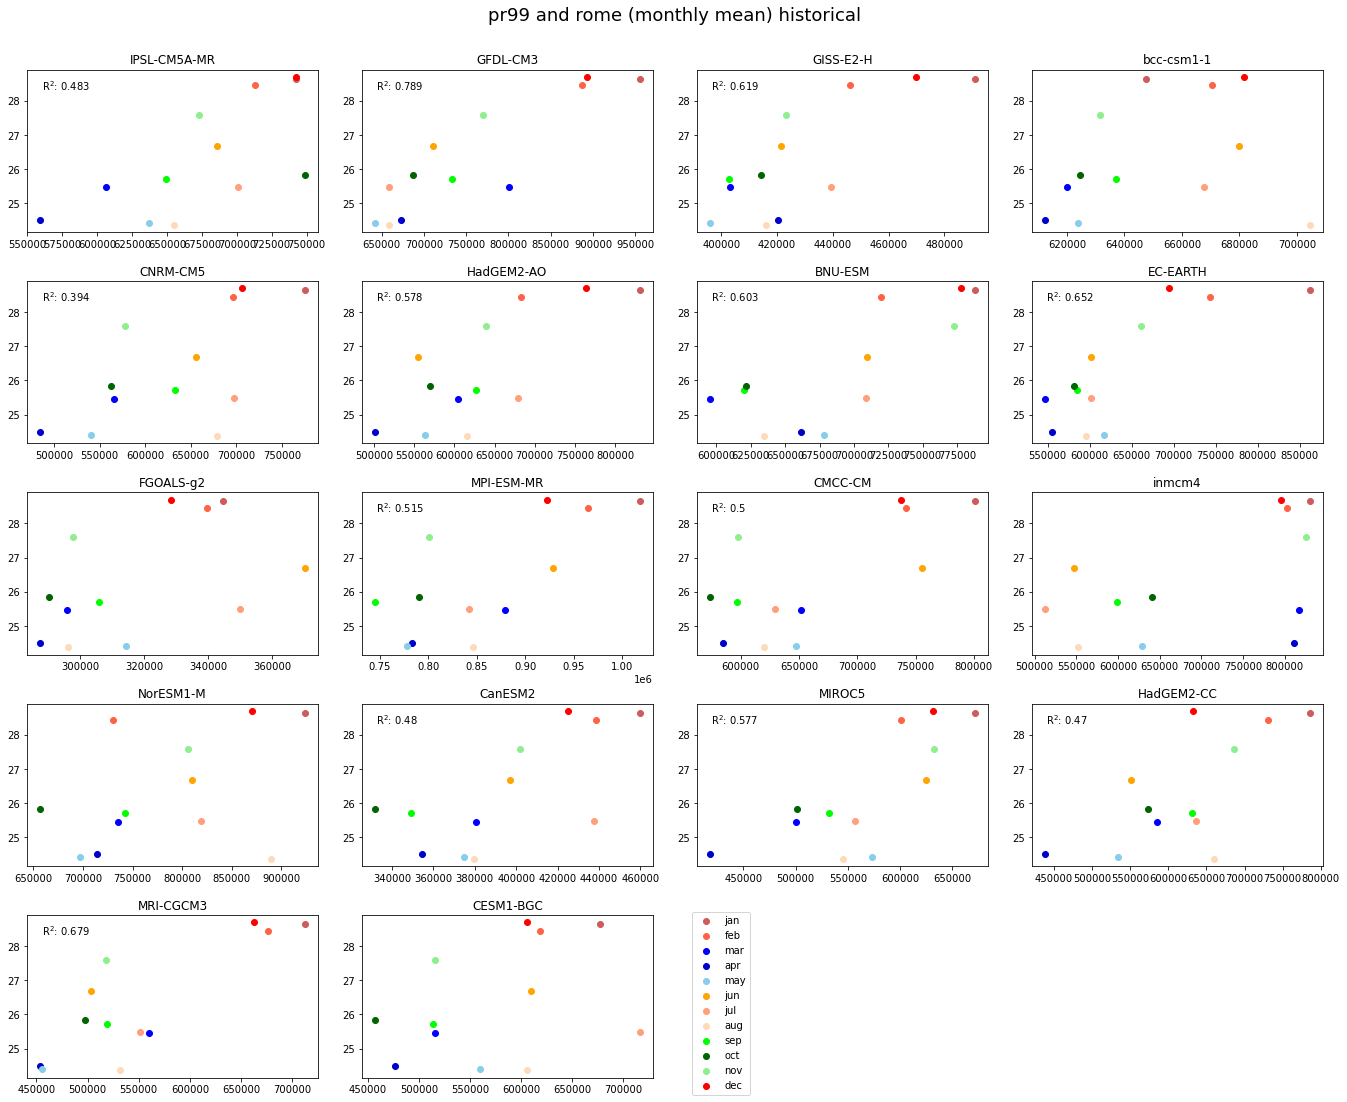

In [60]:
fig= plt.figure(figsize=(22.5,17.5))
fig.suptitle(percentile_option + ' and ' + rome_option  + ' (monthly mean) ' + experiment, fontsize=18, y=0.95)

for i, model in enumerate(models):
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model

    months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul','aug', 'sep', 'oct', 'nov', 'dec'] 


    fileName = model + '_rome_' + experiment + '.nc'
    path = folder + '/' + fileName
    rome = xr.open_dataset(path)
    rome_monthly = to_monthly(rome[rome_option])
    rome_monthly = rome_monthly.assign_coords(month = months)


    fileName = model + '_pr_percentiles_' + experiment + '.nc'
    path = folder + '/' + fileName
    pr_percentile = xr.open_dataset(path)
    pr_monthly = to_monthly(pr_percentiles[percentile_option])
    pr_monthly = pr_monthly.assign_coords(month = months)


    ax= fig.add_subplot(5,4,i+1)
    
    x = rome_monthly.mean(dim='year')
    y = pr_monthly.mean(dim='year')

    colors = ['#cd5c5c', '#ff6347', '#0000ff', '#0000cd', '#87ceeb', '#ffa500', '#ffa07a', '#ffdab9', '#00ff00', '#006400', '#90ee90', '#ff0000']
    for i, month in enumerate(rome_monthly.month.values):
        xi = rome_monthly.mean(dim='year').sel(month=month)
        yi = pr_monthly.mean(dim='year').sel(month=month)
        ax.scatter(xi, yi, c=colors[i], label=month)


    # plt.scatter(x,y,facecolors='none', edgecolor='k')

    #ax.spines.right.set_visible(False)
    #ax.spines.top.set_visible(False)

    res= stats.pearsonr(x,y)

    if res[1]<=0.05:
        ax.annotate('R$^2$: '+ str(round(res[0]**2,3)), xy=(0.2, 0.1), xycoords='axes fraction', xytext=(0.05, 0.875), textcoords='axes fraction')


    plt.title(model)
    
    

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        plt.ylabel(percentile_option + ' (mm/day)')


    if i>=15:
        plt.xlabel('ROME (m$^2$)')

        


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)
plt.legend(bbox_to_anchor=(1.35, 1.05))
#sns.despine(top=True, right=True, left=False, bottom=False)

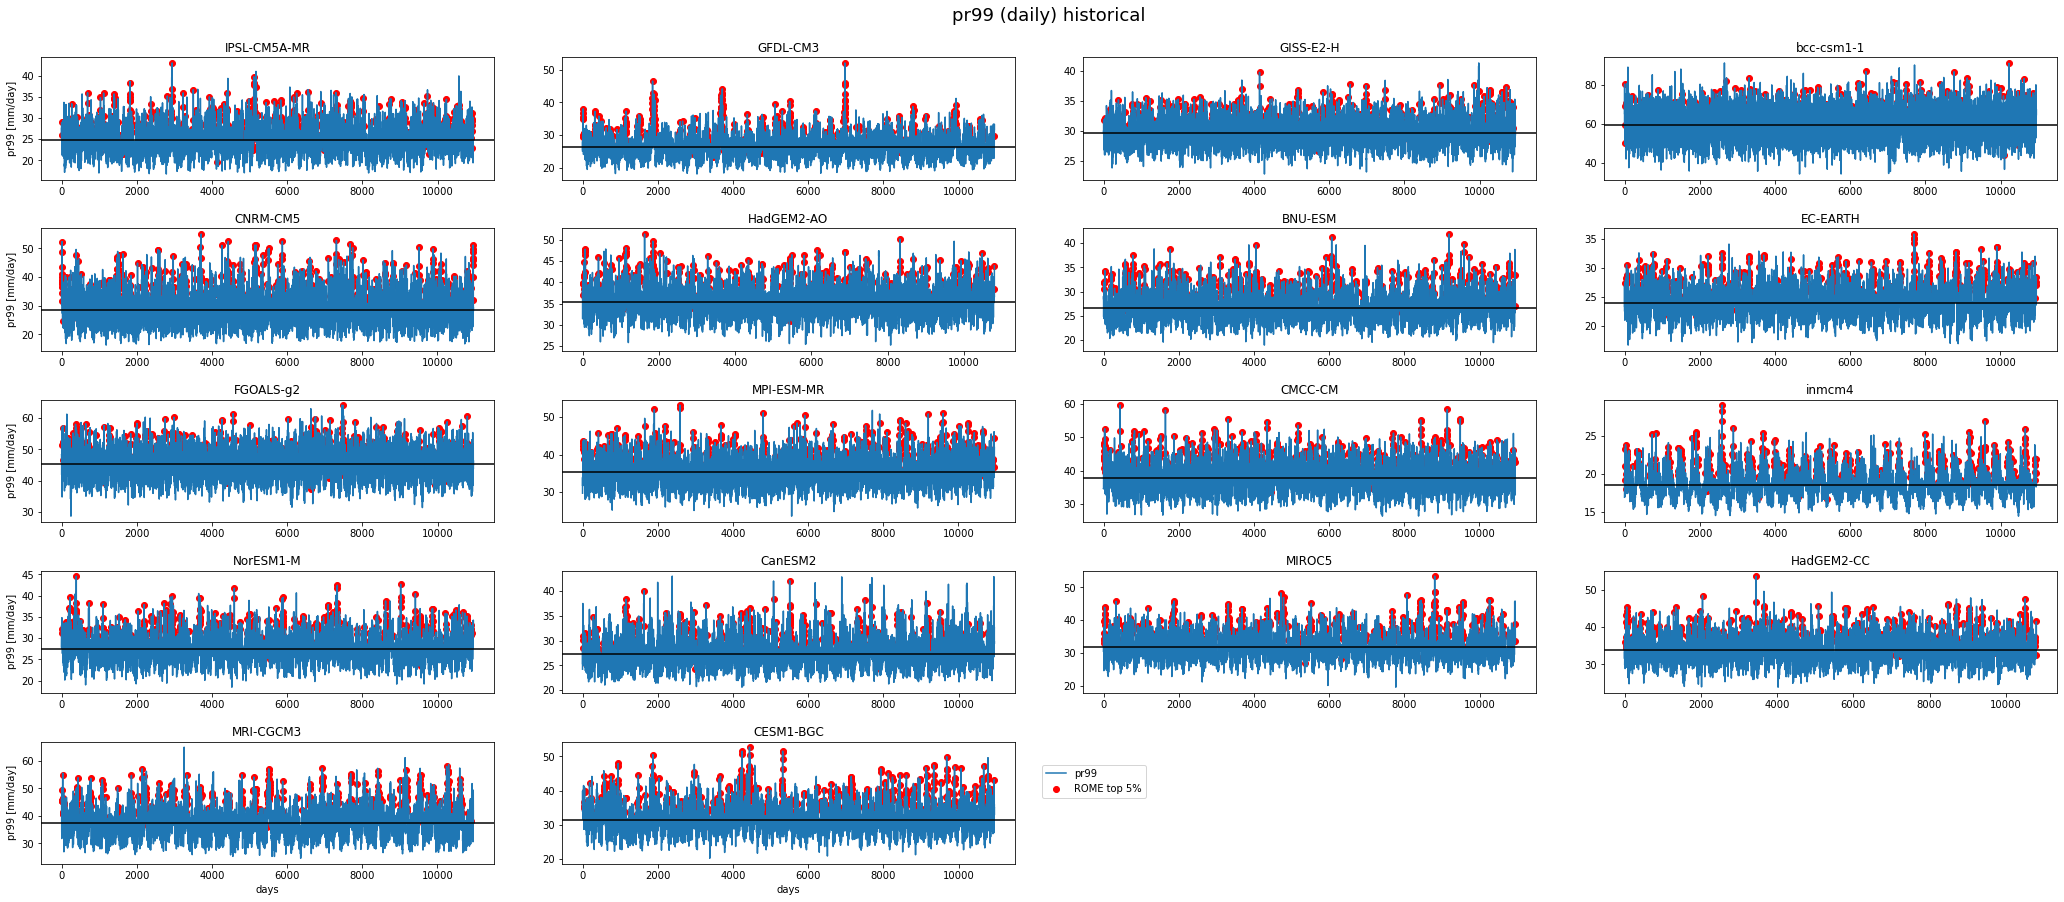

In [82]:
f, axes = plt.subplots(nrows=5, ncols=4, figsize = (35,14))
f.suptitle(percentile_option + ' (daily) ' + experiment, fontsize=18, y=0.95)

for model, ax in zip(models, axes.ravel()):
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model

    fileName = model + '_rome_' + experiment + '.nc'
    path = folder + '/' + fileName
    rome = xr.open_dataset(path)

    fileName = model + '_pr_percentiles_' + experiment + '.nc'
    path = folder + '/' + fileName
    pr_percentiles = xr.open_dataset(path)


    y = pr_percentiles[percentile_option].data
    x= np.arange(0,len(y),1)
    rome_prctile = np.percentile(rome[rome_option],95)
    x2= np.argwhere(rome[rome_option].data>=rome_prctile)

    ax.plot(x,y, label=percentile_option)
    ax.scatter(x2,y[x2],label='ROME top 5%', color='r')
    ax.axhline(y=np.mean(y), color='k')
    ax.set_title(model)
    # ax.set_ylim(0,100)

    if model == 'MRI-CGCM3' or model == 'CESM1-BGC':
        ax.set_xlabel('days')

    if model == 'IPSL-CM5A-MR' or model == 'CNRM-CM5' or model == 'FGOALS-g2' or model == 'NorESM1-M' or model == 'MRI-CGCM3': 
        ax.set_ylabel(percentile_option + ' [mm/day]')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.4)
axes[-1, 2].remove()
axes[-1, 3].remove()
plt.legend(bbox_to_anchor=(1.3, 0.85))